In [4]:
import os
import temul.api as tml
import temul
import atomap.api as am
import hyperspy.api as hs
import matplotlib.pyplot as plt
from temul.topotem import (combine_atom_deviations_from_zone_axes, plot_polarisation_vectors,get_average_polarisation_in_regions_square)
from atomap.tools import remove_atoms_from_image_using_2d_gaussian
import atomap
import numpy as np
from matplotlib import ticker
import matplotlib.colors as colors
%matplotlib widget


def GetLatticeA(image, separation):
    atom_positions_A = am.get_atom_positions(image, separation)
    sublattice_A = am.Sublattice(atom_positions_A, image = image.data)

    sublattice_A.find_nearest_neighbors()
    sublattice_A.refine_atom_positions_using_center_of_mass()
    sublattice_A.refine_atom_positions_using_2d_gaussian()

    sublattice_A.construct_zone_axes()

    sublattice_A_image_float64 = sublattice_A.image.astype(np.float64)

    mat_noA = atomap.tools.remove_atoms_from_image_using_2d_gaussian(sublattice_A_image_float64, sublattice_A)
    mat_noA = mat_noA.astype(np.uint8)

    image_noA = hs.signals.BaseSignal(mat_noA)

    return sublattice_A, image_noA

In [2]:

# Input file location path or os.getcwd() if it's in the same working directory
path = os.getcwd()
file = r'IFFT of 1064A_200kV_15MX_JEOL  ADF_0076-2 cropped 2_bw-1.png'

#Resize Image
image = hs.load(os.path.join(path, file))
image_resized = image.rebin((934, 934))



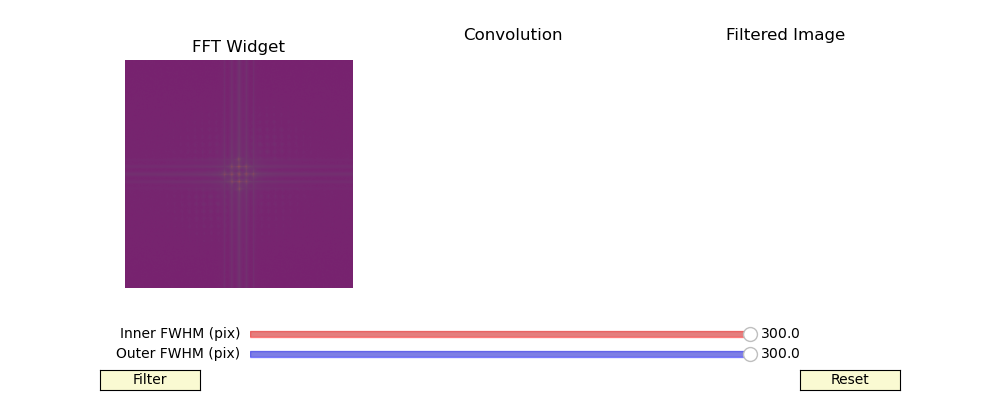

In [7]:
# Visually test which neg or pos value to use for gaussian fft filter
tml.visualise_dg_filter(image_resized, figsize=(10,4))


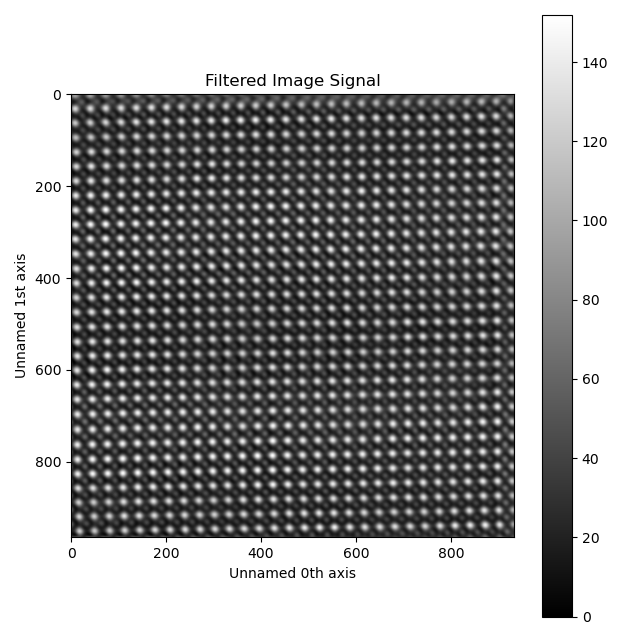

In [8]:
filtered_image = tml.double_gaussian_fft_filter(image_resized, 30, 100)
# Shift all values to be positive
min_val = filtered_image.data.min()
if min_val < 0:
    filtered_image.data -= min_val
image = filtered_image

# Plot the filtered image
filtered_image.plot()

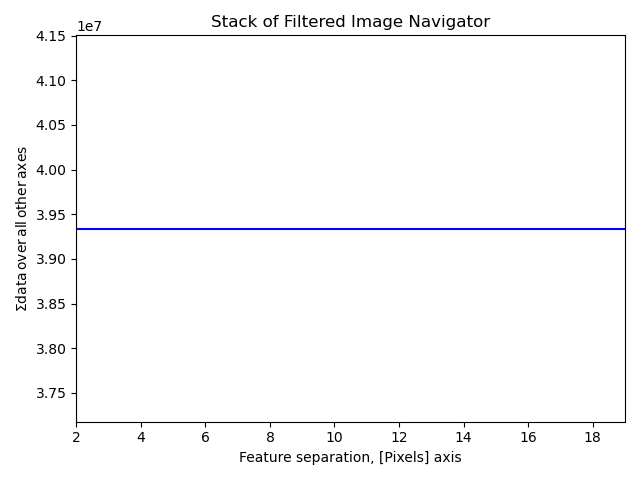

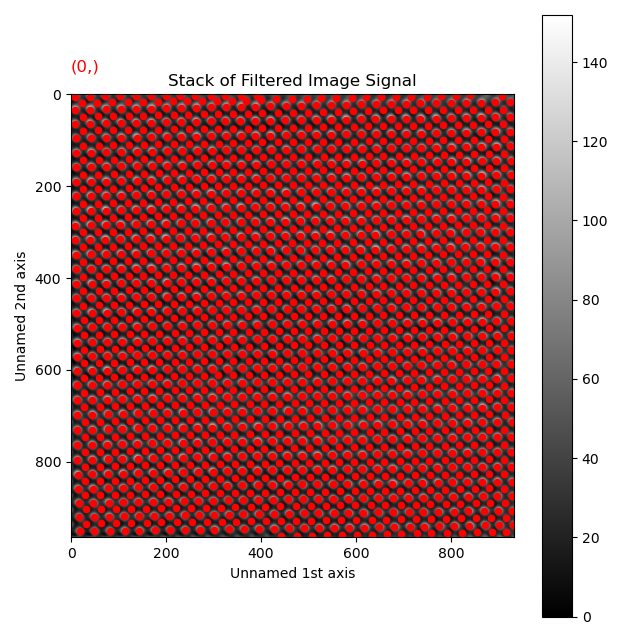

In [11]:
# Determine 

s_peaks = am.get_feature_separation(filtered_image, separation_range=(2, 20), show_progressbar=False)
s_peaks.plot()
